# Time evolution of infinite system
2025 Aug. Tsuyoshi Okubo

In this code, you can perform TEBD and PEPS simulation of the ground state of spin model on infinite chain and infinite square lattice.  

$$\mathcal{H} = \sum_{\langle i,j\rangle } (J_z S_{i,z}S_{j,z} + J_{xy} (S_{i,x}S_{j,x} + S_{i,y}S_{j,y})) - h_x \sum_i S_{i,x} - h_z \sum_i S_{i,z} + D\sum_i S_{i,z}^2$$

This Hamiltonian can represent several situations. For example, when we set parameters,
* $J_z = -1$, $J_{xy} = 0$, $h_x \neq 0$, and $m = 2$

It represents the transverse field Ising chain (with the open boundary condition).
If you set
* $J_z = J_{xy} = 1$, $h_x = 0$

It represents the $S=(m-1)/2$ Heisenberg model (with the open boundary condition).

Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min.


You can change   

- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- hz : amplitude of external field alogn z direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step

In [1]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot
import copy

In [ ]:
## import necessary modules
try:
    import TEBD
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/TEBD.py
    import TEBD

try:
    import iTEBD
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/iTEBD.py
    import iTEBD

try:
    import PEPS_simple as PEPS
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/PEPS_simple.py
    import PEPS_simple as PEPS
try:
    import iPEPS_simple as iPEPS
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/iPEPS_simple.py
    import iPEPS_simple as iPEPS


## Infinite 1d chain

In [3]:
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 0.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary

chi_max = 10 ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step= 2000       ## ITE steps
output_dyn_num = 100 ## output steps


In [4]:
print(f"m = {m}")
print("Hamiltonian parameters:")
print(f"Jz = {Jz}")
print(f"Jxy = {Jxy}")
print(f"hx = {hx}")
print(f"hz = {hz}")
print(f"D = {D}")
print(f"chi_max = {chi_max}")
print(f"tau_max = {tau_max}")
print(f"tau_min = {tau_min}")
print(f"T_step = {T_step}")
print(f"output_dyn_num = {output_dyn_num}")

m = 2
Hamiltonian parameters:
Jz = -1.0
Jxy = 0.0
hx = 0.5
hz = 0.0
D = 0.0
chi_max = 10
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100


In [5]:
##IT simulation by TEBD
Tn, lam,T_list_IT,E_list_IT,mz_list_IT, S_list = iTEBD.iTEBD_IT_Simulation(m,Jz,Jxy,hx,hz,D,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 0.25 0.0 -0.0 [ 0.5 -0.5]
##Dyn 1.956898387873087 -0.2604641644457196 6.522560269672795e-16 0.1054266594940891 [ 0.14510794 -0.14510794]
##Dyn 3.8257218398891855 -0.314277439658759 -4.683753385137379e-17 0.24476013167045832 [ 0.01929369 -0.01929369]
##Dyn 5.610434381147543 -0.31699514925931793 3.933919162646404e-15 0.30311890847798073 [ 0.00303479 -0.00303479]
##Dyn 7.314821626228748 -0.3175829164798972 1.5426028510123757e-14 0.3371803619069006 [ 0.00053081 -0.00053081]
##Dyn 8.942498808990797 -0.3178341674700194 1.617538161790069e-14 0.3606710558403818 [ 0.00010136 -0.00010136]
##Dyn 10.49691845096481 -0.31796857147635676 1.3015945336510362e-14 0.3783290485399327 [ 2.09558654e-05 -2.09558654e-05]
##Dyn 11.981377684616088 -0.31804961333793147 1.394459753152914e-14 0.39230980070516214 [ 4.66570890e-06 -4.66570887e-06]
##Dyn 13.399025247004122 -0.3181025911889038 2.477781201955687e-14 0.40376916224158826 [ 1.11378826e-06 -1.11378821e-06]
##Dyn 14.752868158676053 -0.318139329209

In [6]:
## Calculate Energy
Env_left,Env_right = iTEBD.Calc_Environment_infinite(Tn,lam,canonical=False)
E_inf = iTEBD.Calc_Energy_infinite(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,hz,D)
print(f"iTEBD energy density= {E_inf}")

iTEBD energy density= -0.3182917348640657


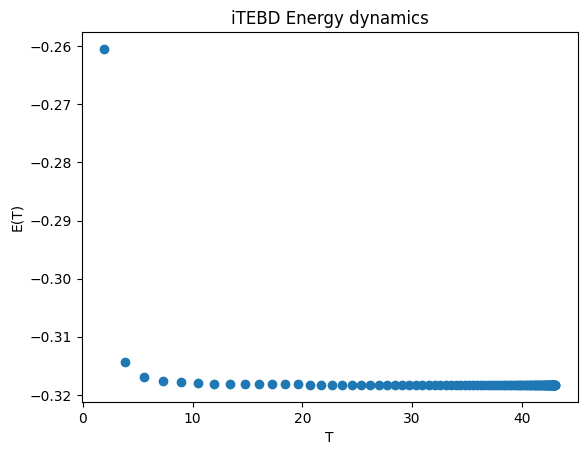

In [7]:
## plot energy dynamics
pyplot.title("iTEBD Energy dynamics")
pyplot.plot(T_list_IT[1:],E_list_IT[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
pyplot.show()


In [8]:
Tn_GS_inf = copy.deepcopy(Tn)
lam_GS_inf = copy.deepcopy(lam)

## Size dependence

Here we check the size dependence of the energy density.

In [11]:
N_list = [2, 4, 6, 8, 10, 20, 40]

In [12]:
E_list_finite = []
for N in N_list:
    print(f"## N = {N}")
    Tn, lam = TEBD.TEBD_IT_Simulation(m,Jz,Jxy,hx,hz,D,N,chi_max,tau_max,tau_min,T_step,output_dyn=False,output_dyn_num=output_dyn_num)
    ## Calculate Energy
    Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
    E_temp = TEBD.Calc_Energy(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,hz,D) / N
    E_list_finite.append(E_temp)
    print(f"TEBD energy density for N={N} = {E_temp}")


## N = 2
TEBD energy density for N=2 = -0.2773500824984765
## N = 4
TEBD energy density for N=4 = -0.2974231459551629
## N = 6
TEBD energy density for N=6 = -0.3040095625816457
## N = 8
TEBD energy density for N=8 = -0.3074359684344107
## N = 10
TEBD energy density for N=10 = -0.3095372350008523
## N = 20
TEBD energy density for N=20 = -0.31384744035335604
## N = 40
TEBD energy density for N=40 = -0.3160582476299404


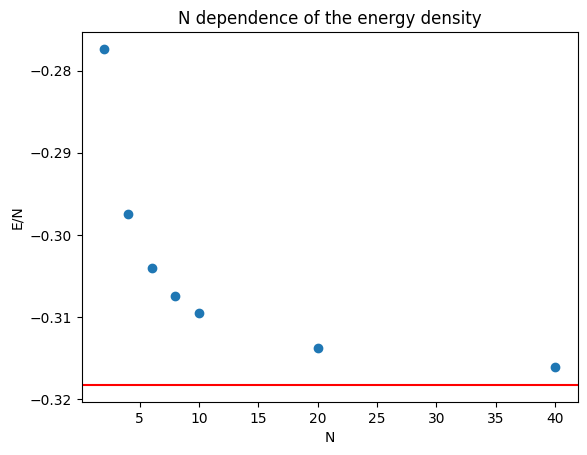

In [13]:
## plot energy-density
pyplot.title("N dependence of the energy density")
pyplot.plot(N_list[:],E_list_finite[:],"o")
pyplot.axhline(y=E_inf, color='red', label="iTEBD energy density")
pyplot.xlabel("N")
pyplot.ylabel("E/N")
pyplot.show()


## Real-time simulation by iTEBD
Similar to the finite size system, we can perform real-time simulation via iTEBD.

In [14]:
## paramters for Time evolution
T_max = 20.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

## for TEBD
dt = 0.01 ## time step for TEBD
t_step = int(T_max / dt)
chi_max = 10

In [15]:
## Real time simulation
Tn, lam,T_list,E_list,mz_list,S_list = iTEBD.iTEBD_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,chi_max,dt, t_step, Tn_GS_inf, lam_GS_inf,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -0.3182917348639242 -1.4156060754113127e-13 0.5094518464184852 [-1.44006925e-13 -1.39114290e-13]
##Dyn 0.2 -0.3182917443124977 0.003227674771522638 0.5094426184041195 [0.00322767 0.00322767]
##Dyn 0.4 -0.31829172493402264 0.012741616267198034 0.5097149951323254 [0.01274162 0.01274162]
##Dyn 0.6 -0.31829168419240217 0.02803203598245387 0.5105848831582519 [0.02803204 0.02803204]
##Dyn 0.8 -0.31829163489404994 0.04824435497727168 0.5127833706327021 [0.04824435 0.04824435]
##Dyn 1.0 -0.3182915902759964 0.0721841407482133 0.5172986931660469 [0.07218414 0.07218414]
##Dyn 1.2 -0.31829155906261464 0.09834790024125861 0.525227604650319 [0.0983479 0.0983479]
##Dyn 1.4000000000000001 -0.31829154254291736 0.12499978565591013 0.5375227189418216 [0.12499979 0.12499979]
##Dyn 1.6 -0.31829153461763093 0.15031075938194885 0.5547018785054739 [0.15031076 0.15031076]
##Dyn 1.8 -0.3182915248001619 0.17256313187910136 0.5766213832620587 [0.17256313 0.17256313]
##Dyn 2.0 -0.3182915032292812 0.19039

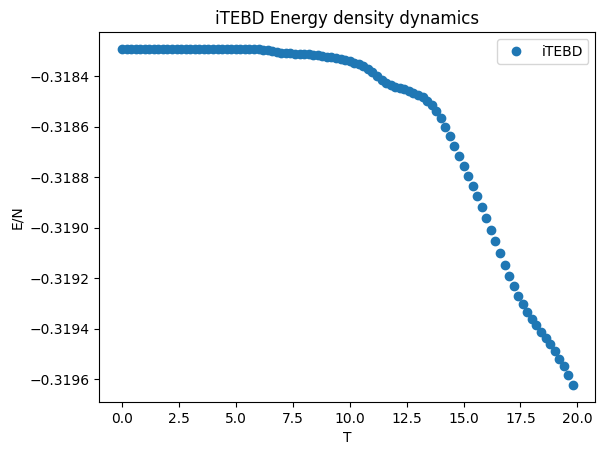

In [16]:
## plot energy dynamics

#print(T_list_ED)
pyplot.title("iTEBD Energy density dynamics")
pyplot.plot(T_list,E_list,"o", label="iTEBD")
pyplot.xlabel("T")
pyplot.ylabel("E/N")
pyplot.legend()
pyplot.show()


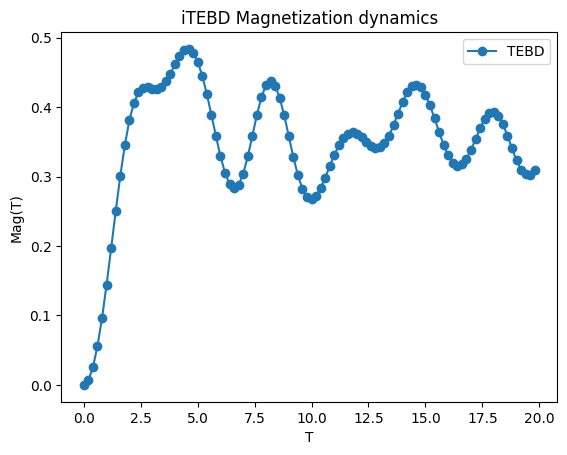

In [17]:
## plot total mag dynamics
total_mag = []
for i in range(len(E_list)):
    mag = np.sum(mz_list[i])
    total_mag.append(mag)

pyplot.title("iTEBD Magnetization dynamics")
pyplot.plot(T_list,total_mag,"o-", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
pyplot.legend()
pyplot.show()


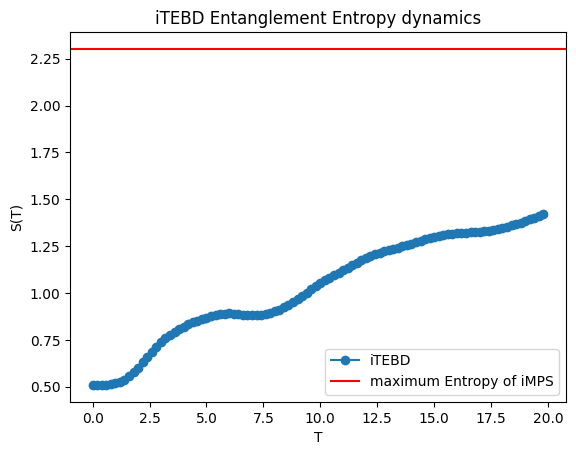

In [18]:
## plot Entropy

pyplot.title("iTEBD Entanglement Entropy dynamics")
pyplot.plot(T_list,S_list,"o-", label="iTEBD")
pyplot.axhline(y=np.log(chi_max), color='red', label='maximum Entropy of iMPS')
pyplot.xlabel("T")
pyplot.ylabel("S(T)")
pyplot.legend()
pyplot.show()


### Bond-dimension dependnce
Here we investigate the bond-dimension (chi_max) dependence in the magnetization dynamics.


In [19]:
chi_max_list = [4, 8, 12, 16, 20]


In [20]:
E_list_chi = []
total_mag_list_chi = []
S_list_chi = []
E_GS_list_chi = []
for chi_max_temp in chi_max_list:
    print(f"## chi_max = {chi_max_temp}")
    Tn_GS, lam_GS = iTEBD.iTEBD_IT_Simulation(m,Jz,Jxy,hx,hz,D,chi_max_temp,tau_max,tau_min,T_step,output_dyn=False,output_dyn_num=output_dyn_num)
    ## Calculate Energy
    Env_left,Env_right = iTEBD.Calc_Environment_infinite(Tn_GS,lam_GS,canonical=False)
    E_GS_temp = iTEBD.Calc_Energy_infinite(Env_left,Env_right,Tn_GS,lam_GS,Jz,Jxy,hx,hz,D)
    E_GS_list_chi.append(E_GS_temp)
    print(f"iTEBD energy density for chi_max={chi_max_temp} = {E_GS_temp}")

    Tn_RT_temp, lam_RT_temp,T_list_RT,E_list_RT_temp,mz_list_RT_temp,S_list_RT_temp = iTEBD.iTEBD_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,chi_max_temp,dt, t_step, Tn_GS, lam_GS,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

    ## total mag dynamics
    total_mag_temp = []
    for i in range(len(E_list_RT_temp)):
        mag = np.sum(mz_list_RT_temp[i])
        total_mag_temp.append(mag)
    total_mag_list_chi.append(total_mag_temp)
    E_list_chi.append(E_list_RT_temp)
    S_list_chi.append(S_list_RT_temp)

## chi_max = 4
iTEBD energy density for chi_max=4 = -0.3182631350097397
##Dyn 0.0 -0.31826313500937303 -3.6665680559640554e-13 0.4878580093528948 [-3.65919191e-13 -3.67394420e-13]
##Dyn 0.2 -0.3182631537456106 0.0032347862428980375 0.48784961723401415 [0.00323479 0.00323479]
##Dyn 0.4 -0.3182631986164046 0.012770070020341792 0.48812188571427906 [0.01277007 0.01277007]
##Dyn 0.6 -0.3182633218909722 0.02809587073206629 0.48899125402226234 [0.02809587 0.02809587]
##Dyn 0.8 -0.31826355107602067 0.048356760657991556 0.4911864908817058 [0.04835676 0.04835676]
##Dyn 1.0 -0.3182638526246614 0.07235621678967621 0.4956934850865742 [0.07235622 0.07235622]
##Dyn 1.2 -0.31826413612393983 0.09858683631994507 0.5036102055086904 [0.09858684 0.09858684]
##Dyn 1.4000000000000001 -0.3182643275052408 0.12530666608692714 0.5158935916175007 [0.12530667 0.12530667]
##Dyn 1.6 -0.31826440676626444 0.150678437562678 0.5330656600515047 [0.15067844 0.15067844]
##Dyn 1.8 -0.31826437056295476 0.17297494687157358 0.

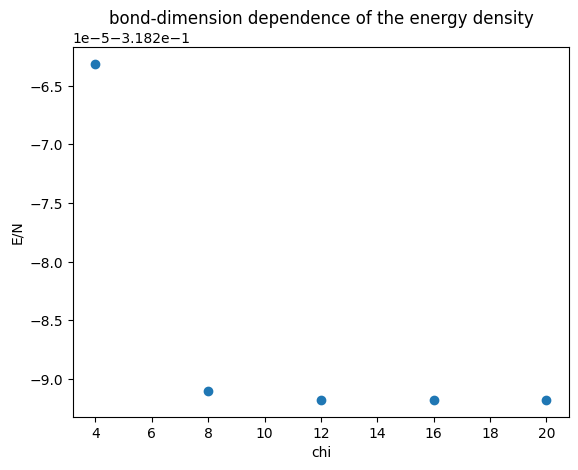

In [21]:
## plot energy-density
pyplot.title("bond-dimension dependence of the energy density")
pyplot.plot(chi_max_list[:],E_GS_list_chi[:],"o")
pyplot.xlabel("chi")
pyplot.ylabel("E/N")
pyplot.show()


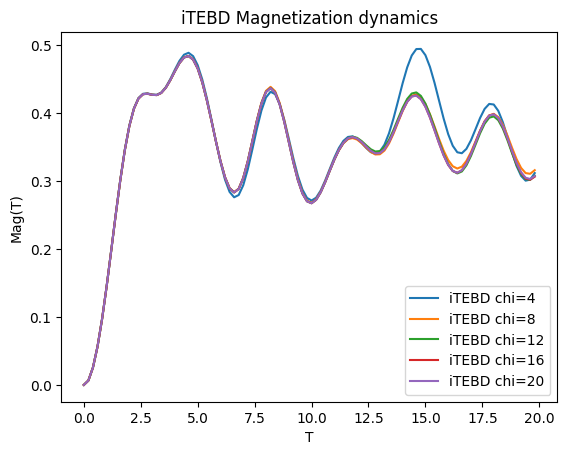

In [22]:
## plot total mag dynamics
pyplot.title("iTEBD Magnetization dynamics")
for i, chi_max_temp in enumerate(chi_max_list):
    pyplot.plot(T_list_RT,total_mag_list_chi[i],"-", label=f"iTEBD chi={chi_max_temp}")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
pyplot.legend()
pyplot.show()


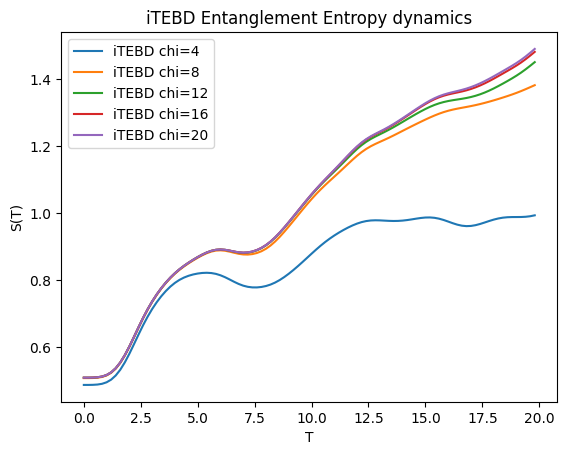

In [23]:
## plot entanglement entropy dynamics
pyplot.title("iTEBD Entanglement Entropy dynamics")
for i, chi_max_temp in enumerate(chi_max_list):
    pyplot.plot(T_list_RT,S_list_chi[i],"-", label=f"iTEBD chi={chi_max_temp}")
pyplot.xlabel("T")
pyplot.ylabel("S(T)")
pyplot.legend()
pyplot.show()


## iPEPS simulation  
We can also consider infinite version of PEPS (iPEPS).

In [24]:
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 1.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy

chi_max_peps = 4  ## maxmum bond dimension at truncation
tau_max_peps = 0.01    ## start imaginary time tau
tau_min_peps = 0.005   ## final imaginary time tau
T_step_peps = 2000       ## ITE steps
output_dyn_num_peps = 100 ## output steps
second_ST = False #True ## calculate second order Suzuki-Trotter expansion

## unit-cell for iPEPS
Lx = 2
Ly = 2

In [25]:
##IT simulation by PEPS
Tn, lam,T_list_peps,E_list_peps,mz_list_peps = iPEPS.simple_IT_Simulation(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max_peps,tau_max_peps,tau_min_peps,T_step_peps,second_ST = second_ST, output_dyn=True,output_dyn_num=output_dyn_num_peps)

##Dyn 0.0 0.5 0.0
##Dyn 0.19934299107590414 0.17699807773703718 -5.551115123125783e-17
##Dyn 0.3973090195313565 -0.25938658258686276 -1.2212453270876722e-15
##Dyn 0.5939075967419407 -0.5633525201951614 -9.159339953157541e-16
##Dyn 0.7891481683833703 -0.7018780114996803 -4.593547764386585e-15
##Dyn 0.9830401148853111 -0.7570884728479615 -5.398459457239824e-15
##Dyn 1.1755927518820675 -0.7786813754927234 -1.7520707107365752e-15
##Dyn 1.3668153306601574 -0.7872065283760764 -2.3245294578089215e-16
##Dyn 1.5567170386027962 -0.790620837951321 2.4164698020356923e-15
##Dyn 1.7453069996313064 -0.7920083541147739 4.570996359198887e-15
##Dyn 1.9325942746434834 -0.7925808249687489 6.940628627383205e-15
##Dyn 2.118587861948928 -0.7928212037231134 5.221517662690189e-15
##Dyn 2.3032966977013785 -0.7929245116688499 -3.333271159089435e-15
##Dyn 2.4867296563280488 -0.7929704758989289 -5.843416028827875e-15
##Dyn 2.668895550956007 -0.7929920933365371 -1.670863968017411e-14
##Dyn 2.8498031338356062 -0.793

In [26]:
## Calculate Energy
E_ipeps = iPEPS.Calc_Energy(Tn,lam,Jz,Jxy,hx,hz,D,Lx,Ly) /(Lx * Ly)
print(f"iPEPS energy = {E_ipeps}")

iPEPS energy = -0.7966778301914337


In [27]:
Tn_GS_iPEPS = copy.deepcopy(Tn)
lam_GS_iPEPS = copy.deepcopy(lam)

### Size dependence
Here we check the size dependence of the energy density.

In [30]:
L_list = [2, 4, 6, 8]

In [31]:
E_list_finite_peps = []
for L in L_list:
    print(f"## L = {L}")
    Tn, lam = PEPS.simple_IT_Simulation(m,Jz,Jxy,hx,hz,D,L,L,chi_max_peps,tau_max_peps,tau_min_peps,T_step_peps,output_dyn=False,output_dyn_num=output_dyn_num_peps)
    ## Calculate Energy
    E_temp = PEPS.Calc_Energy(Tn,lam,Jz,Jxy,hx,hz,D,L,L) /(L * L)
    E_list_finite_peps.append(E_temp)
    print(f"PEPS energy density for L={L} = {E_temp}")


## L = 2
PEPS energy density for L=2 = -0.7709079447445814
## L = 4
PEPS energy density for L=4 = -0.7819189847198754
## L = 6
PEPS energy density for L=6 = -0.7856473397604214
## L = 8
PEPS energy density for L=8 = -0.7875211364647589


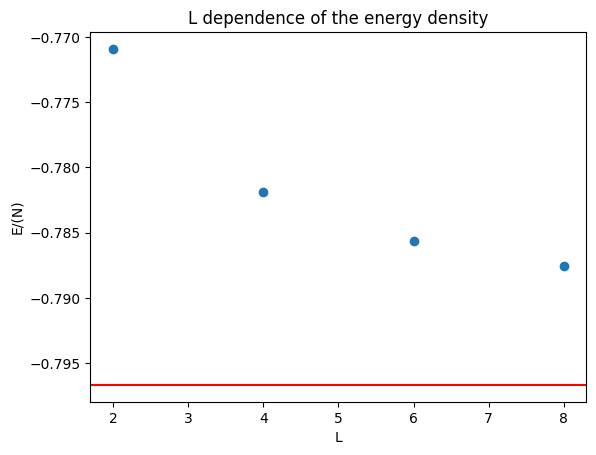

In [32]:
## plot energy-density
pyplot.title("L dependence of the energy density")
pyplot.plot(L_list[:],E_list_finite_peps[:],"o")
pyplot.axhline(y=E_ipeps, color='red', label="iPEPS energy density")
pyplot.xlabel("L")
pyplot.ylabel("E/(N)")
pyplot.show()


### Real-time simulation by iPEPS
Similar to the finite size system, we can perform real-time simulation by iPEPS

In [33]:
## paramters for Time evolution
T_max_peps = 20.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

dt_peps = 0.01 ## time step for TEBD
t_step_peps = int(T_max_peps / dt_peps)
chi_max_peps = 6

In [34]:
## Real time simulation by PEPS
Tn, lam,T_list_peps_RT,E_list_peps_RT,mz_list_peps_RT = iPEPS.simple_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max_peps,dt_peps, t_step_peps, Tn_GS_iPEPS, lam_GS_iPEPS,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -0.5590363686035589 0.056473464265621345
##Dyn 0.2 -0.5590566995995803 0.05068284964948179
##Dyn 0.4 -0.5590556140608467 0.03507811900267461
##Dyn 0.6 -0.5590535693144709 0.015546848731251003
##Dyn 0.8 -0.5590515533270205 0.0015207783751009073
##Dyn 1.0 -0.5590504917689924 0.004236703211042629
##Dyn 1.2 -0.5590506592142527 0.03151781801544919
##Dyn 1.4000000000000001 -0.5590514514804983 0.07927999721479238
##Dyn 1.6 -0.5590519318590894 0.1267589832625301
##Dyn 1.8 -0.559051819460811 0.14666338899680315
##Dyn 2.0 -0.5590517667598025 0.12769912522019214
##Dyn 2.2 -0.5590524455319152 0.0848571088443757
##Dyn 2.4 -0.559053647036049 0.043174162386178716
##Dyn 2.6 -0.5590545394322329 0.016507022462966443
##Dyn 2.8000000000000003 -0.559054520808352 0.004320001052992629
##Dyn 3.0 -0.5590536807585671 0.0005215317267843002
##Dyn 3.2 -0.5590525236240672 8.610478494827236e-07
##Dyn 3.4 -0.5590515940963752 3.925565780462805e-05
##Dyn 3.6 -0.5590513180663609 5.143388713434652e-05
##Dyn 3.8

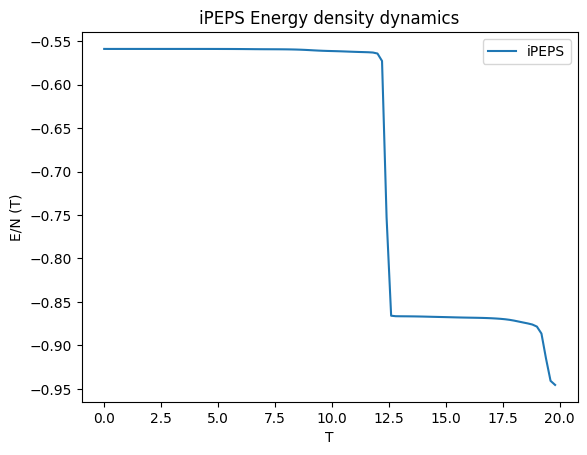

In [35]:
## plot energy dynamics

pyplot.title("iPEPS Energy density dynamics")
pyplot.plot(T_list_peps_RT,E_list_peps_RT,"-", label="iPEPS")
pyplot.xlabel("T")
pyplot.ylabel("E/N (T)")
pyplot.legend()
pyplot.show()


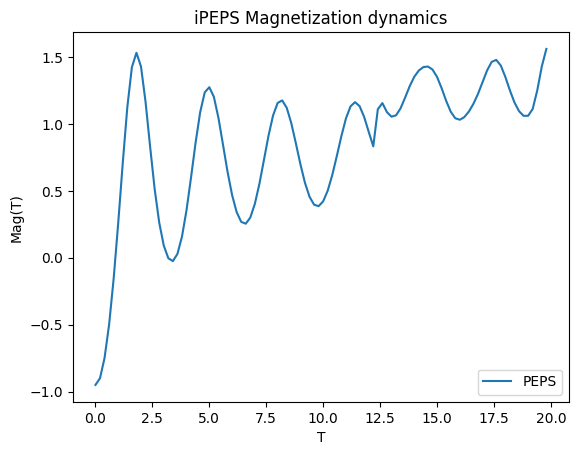

In [36]:
## plot total mag dynamics
total_mag_peps_RT = []
for i in range(len(E_list_peps_RT)):
    mag = np.sum(mz_list_peps_RT[i])
    total_mag_peps_RT.append(mag)

pyplot.title("iPEPS Magnetization dynamics")
pyplot.plot(T_list_peps_RT,total_mag_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
pyplot.legend()
pyplot.show()


### Bond-dimension dependnce of iPEPS
Here we investigate the bond-dimension (chi_max) dependence in the magnetization dynamics for iPEPS simulation


In [37]:
chi_max_list = [2, 3, 4, 5, 6, 7, 8]

## paramters for Time evolution
T_max_peps = 20.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

dt_peps = 0.05 ## time step for TEBD
t_step_peps = int(T_max_peps / dt_peps)

In [38]:
E_list_chi = []
total_mag_list_chi = []
S_list_chi = []
E_GS_list_chi = []
for chi_max_temp in chi_max_list:
    print(f"## chi_max = {chi_max_temp}")
    Tn_GS_ipeps, lam_GS_ipeps = iPEPS.simple_IT_Simulation(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max_temp,tau_max_peps,tau_min_peps,T_step_peps,second_ST = second_ST, output_dyn=False,output_dyn_num=output_dyn_num_peps)
    ## Calculate Energy
    E_GS_temp = iPEPS.Calc_Energy(Tn_GS_ipeps,lam_GS_ipeps,Jz,Jxy,hx,hz,D,Lx,Ly) /(Lx * Ly)
    E_GS_list_chi.append(E_GS_temp)
    print(f"iTEBD energy density for chi_max={chi_max_temp} = {E_GS_temp}")
    Tn_RT_temp, lam_RT_temp,T_list_peps_RT,E_list_RT_temp,mz_list_RT_temp = iPEPS.simple_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max_temp,dt_peps, t_step_peps, Tn_GS_iPEPS, lam_GS_iPEPS,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

    ## total mag dynamics
    total_mag_temp = []
    for i in range(len(E_list_RT_temp)):
        mag = np.sum(mz_list_RT_temp[i])
        total_mag_temp.append(mag)
    total_mag_list_chi.append(total_mag_temp)
    E_list_chi.append(E_list_RT_temp)
    S_list_chi.append(S_list_RT_temp)

## chi_max = 2
iTEBD energy density for chi_max=2 = -0.7931439781268161
##Dyn 0.0 -0.5590363686035589 0.056473464265621345
##Dyn 0.2 -0.5590461686674628 0.05068025667889546
##Dyn 0.4 -0.5590023588561677 0.035081120414268085
##Dyn 0.6000000000000001 -0.5589505757530238 0.015553458022928032
##Dyn 0.8 -0.5589112059036979 0.0015247821771103495
##Dyn 1.0 -0.5589008753588778 0.004226694529944543
##Dyn 1.2000000000000002 -0.5589176387812369 0.03148508231873874
##Dyn 1.4000000000000001 -0.5589415187483544 0.0792326317612658
##Dyn 1.6 -0.5589538942880619 0.12673404627312718
##Dyn 1.8 -0.5589605053399678 0.1467352310829008
##Dyn 2.0 -0.5589882908026605 0.12796075591780398
##Dyn 2.2 -0.5590505693366187 0.08534603932071891
##Dyn 2.4000000000000004 -0.5591272835793554 0.04380610590224489
##Dyn 2.6 -0.5592848832846176 0.01712097382038793
##Dyn 2.8000000000000003 -0.5597014454539377 0.00479559590411163
##Dyn 3.0 -0.5602763665083519 0.0007835803386840787
##Dyn 3.2 -0.560769602678592 3.82146318797768e-

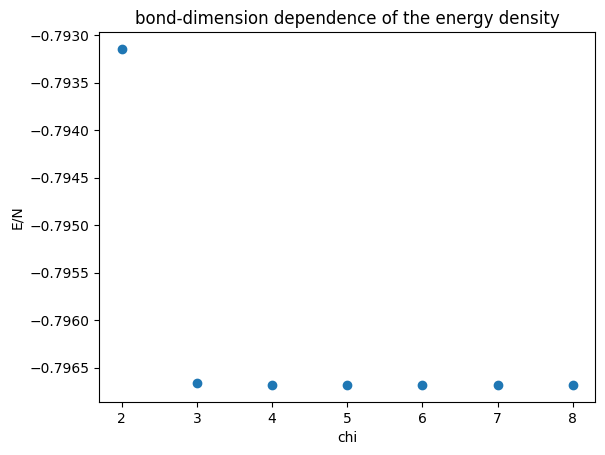

In [39]:
## plot energy-density
pyplot.title("bond-dimension dependence of the energy density")
pyplot.plot(chi_max_list[:],E_GS_list_chi[:],"o")
pyplot.xlabel("chi")
pyplot.ylabel("E/N")
pyplot.show()


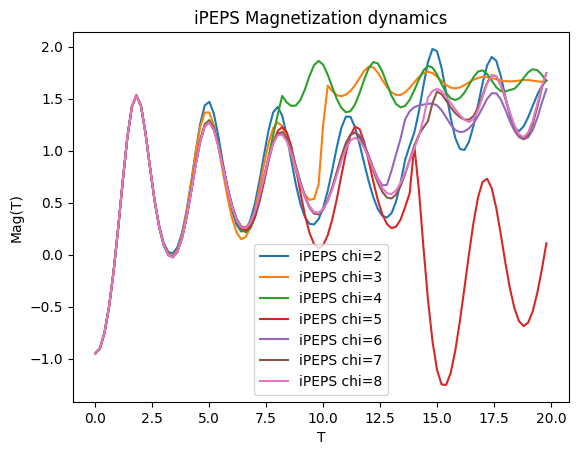

In [41]:
## plot total mag dynamics
pyplot.title("iPEPS Magnetization dynamics")
for i, chi_max_temp in enumerate(chi_max_list):
    pyplot.plot(T_list_peps_RT,total_mag_list_chi[i],"-", label=f"iPEPS chi={chi_max_temp}")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
pyplot.legend()
pyplot.show()


# Important notice for (i)PEPS simulation
The code used in this notebook uses the mean-field environment to calculate physical quantities. The mean-field environment is an approximation where we neglect loop structures in the tensor network, and then the result becomes similar to that of a model on a tree (Bethe lattice). To improve the calculation of physical quantities, we have to consider the (approximate) contraction of the full tensor networ, such as CTMRG.  

Similarly to the mean-field environment, the simple-update method uses a local optimization. In the simple update, the approximation (trucntion) due to a finite bond-dimesion is not accurate, and therefore the state is fully optimized for the given bond-dimension.